In [1]:
#Approach
#1Computer vision reads in pixels from image file. Encodes to RGB values
#2 Overlay a grid using userinput, average the value of pixels inside each grid square to a single RGB value
#3 Match the values inside the grid squares to closest DMC value using Eucledian distance

In [2]:
#imports
import pandas as pd
import numpy as np


import webcolors
import cv2

import matplotlib.pyplot as plt
import plotly.express as px 

In [3]:
#load data
#DMC color list
file= r'C:\Users\jimmy\OneDrive\Desktop\crossstitch\DMC.csv'
df=pd.read_csv(file)

#Picture that we are converting
filename = 'savedImage.jpg'# Load the image
image_path = r'C:\Users\jimmy\OneDrive\Desktop\crossstitch\dragon.jpg'
image = cv2.imread(image_path)

In [4]:
#completed functions

def overlay_grid(image, grid_size):
    height, width, _ = image.shape
    step_h = height // grid_size[0]
    step_w = width // grid_size[1]

    for i in range(0, height, step_h):
        cv2.line(image, (0, i), (width, i), (0, 0, 255), 1)

    for j in range(0, width, step_w):
        cv2.line(image, (j, 0), (j, height), (0, 0, 255), 1)

def identify_colors(image, grid_size):
    height, width, _ = image.shape
    step_h = height // grid_size[0]
    step_w = width // grid_size[1]

    colors = []

    for i in range(0, height, step_h):
        for j in range(0, width, step_w):
            color = np.mean(image[i:i+step_h, j:j+step_w], axis=(0, 1))
            colors.append(color)

    return colors

def calculate_color_distance(color1, color2):
    return np.sqrt(np.sum((color1 - color2) ** 2))

def match_color_to_list(random_color, color_list):
    min_distance = float('inf')
    matched_color = None
    
    for color in color_list:
        distance = calculate_color_distance(random_color, color)
        if distance < min_distance:
            min_distance = distance
            matched_color = color
    
    return matched_color

def hex_match(matched_colors):
    my_list=[]
    for color in matched_colors:
        my_list.append(rgb_to_hex(color).upper())
    return my_list

def dmc_threads(hex_colors):
    dmc_list=[]
    for hexc in hex_colors:
         dmc_list.append(df.loc[df['Hex Code'] == hexc])
    return dmc_list  


def rgb_to_hex(rgb_color):
    hex_color = webcolors.rgb_to_hex(rgb_color)
    return hex_color


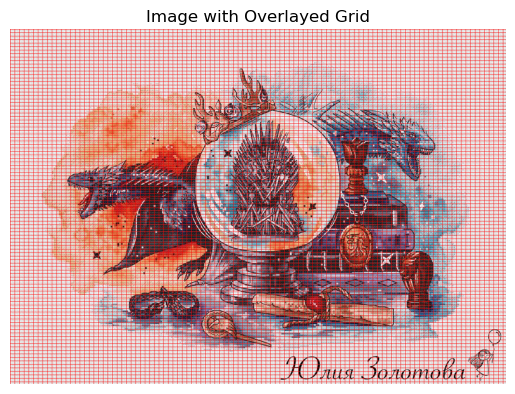

In [94]:
# Define the grid size (rows, columns)
grid_size = (100, 100)

# Overlay grid on the image
overlayed_image = image.copy()
overlay_grid(overlayed_image, grid_size)
#x=overlay_grid(overlayed_image, grid_size)
# Identify colors within each grid cell
colors = identify_colors(image, grid_size)

# Display the overlayed image
plt.imshow(cv2.cvtColor(overlayed_image, cv2.COLOR_BGR2RGB))
plt.title('Image with Overlayed Grid')
plt.axis('off')
plt.show()

#filename = 'crossgrid_ex.jpg'
#cv2.imwrite(filename, image)

cv2.destroyAllWindows()

In [95]:
#Make a function that writes colors

df1=df.dropna(subset=['Red','Green','Blue'])
df1=df1[['Red','Green','Blue']].astype(int)
x=df1[['Red','Green','Blue']].values.tolist()
#df1=df1[['Blue','Green','Red']].astype(int)
#x=df1[['Blue','Green','Red']].values.tolist()

In [96]:
matched_colors=[]
for color in colors:
    for c in color:
        matched=match_color_to_list(color,x)
        matched_colors.append(matched)
hex_colors=hex_match(matched_colors)
example=dmc_threads(hex_colors)
#example

In [97]:
x=pd.DataFrame(np.concatenate(example))
x=x[[6,5,4]].values.tolist()
x=x[0:grid_size[0]*grid_size[1]]
#x=x[0:2500]
p=  [x[i:i+grid_size[0]] for i in range(0, len(x), grid_size[0])]


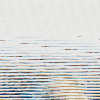

In [98]:
pp=np.array(p,dtype=np.uint8)
fig = px.imshow(pp)
fig.show()

In [67]:
color

array([230.3, 230.3, 230.3])

In [68]:
img_rgb = np.array([[[255, 0, 0], [0, 255, 0], [0, 0, 255]],
                    [[0, 255, 0], [0, 0, 255], [255, 0, 0]],
                    [[238, 249, 253], [0, 0, 255], [255, 0, 0]]                    
                   ], dtype=np.uint8)

In [69]:
matched_colors=[]
for color in img_rgb:
    matched=match_color_to_list(color,x)
    matched_colors.append(matched)
hex_colors=hex_match(matched_colors)
example=dmc_threads(hex_colors)

In [71]:
x=pd.DataFrame(np.concatenate(example))
x=x[[6,5,4]].values.tolist()
#x=x[0:grid_size[0]*grid_size[1]]
x=x[0:8]
p=  [x[i:i+3] for i in range(0, len(x), 3)]

In [101]:
p=[ff[i:i+3] for i in range(0, len(ff), 3)]
pp=np.array(p,dtype=np.uint8)
fig = px.imshow(pp)
fig.show()

In [73]:
matched_colors

[[86, 86, 86], [86, 86, 86], [124, 111, 149]]

In [99]:
ff=[]
for color in img_rgb:
    for c in color:
        ff.append(match_color_to_list(c,xx))
        

In [100]:
ff

[[250, 50, 3],
 [71, 167, 47],
 [77, 46, 138],
 [71, 167, 47],
 [77, 46, 138],
 [250, 50, 3],
 [238, 252, 252],
 [77, 46, 138],
 [250, 50, 3]]

In [77]:
xx=df1[['Red','Green','Blue']].values.tolist()

In [78]:
xx

[[255, 226, 226],
 [255, 201, 201],
 [245, 173, 173],
 [241, 135, 135],
 [227, 109, 109],
 [191, 45, 45],
 [254, 215, 204],
 [253, 156, 151],
 [233, 106, 103],
 [224, 72, 72],
 [210, 16, 53],
 [187, 5, 31],
 [255, 203, 213],
 [255, 173, 188],
 [255, 121, 146],
 [231, 73, 103],
 [227, 29, 66],
 [199, 43, 59],
 [183, 31, 51],
 [167, 19, 43],
 [151, 11, 35],
 [135, 7, 31],
 [123, 0, 27],
 [255, 178, 187],
 [252, 144, 162],
 [255, 121, 140],
 [255, 87, 115],
 [255, 223, 217],
 [253, 181, 181],
 [255, 145, 145],
 [86, 74, 74],
 [255, 215, 215],
 [255, 189, 189],
 [230, 138, 138],
 [207, 115, 115],
 [234, 134, 153],
 [219, 85, 110],
 [179, 47, 72],
 [145, 53, 70],
 [255, 238, 235],
 [251, 173, 180],
 [252, 176, 185],
 [242, 118, 136],
 [238, 84, 110],
 [179, 59, 75],
 [240, 206, 212],
 [228, 166, 172],
 [232, 135, 155],
 [218, 103, 131],
 [188, 67, 101],
 [171, 2, 73],
 [251, 191, 194],
 [231, 169, 172],
 [201, 107, 112],
 [171, 51, 87],
 [136, 21, 49],
 [255, 192, 205],
 [255, 176, 190],
 [

In [84]:
for color in img_rgb:
    for c in color:
        print(c)
        
       
        

[255   0   0]
[  0 255   0]
[  0   0 255]
[  0 255   0]
[  0   0 255]
[255   0   0]
[238 249 253]
[  0   0 255]
[255   0   0]


In [87]:
img_rgb

array([[[255,   0,   0],
        [  0, 255,   0],
        [  0,   0, 255]],

       [[  0, 255,   0],
        [  0,   0, 255],
        [255,   0,   0]],

       [[238, 249, 253],
        [  0,   0, 255],
        [255,   0,   0]]], dtype=uint8)

In [102]:
x

[[232, 232, 230],
 [232, 232, 230],
 [232, 232, 230],
 [232, 232, 230],
 [232, 232, 230],
 [232, 232, 230],
 [232, 232, 230],
 [232, 232, 230],
 [232, 232, 230],
 [230, 227, 227],
 [230, 227, 227],
 [230, 227, 227],
 [232, 232, 230],
 [232, 232, 230],
 [232, 232, 230],
 [232, 232, 230],
 [232, 232, 230],
 [232, 232, 230],
 [232, 232, 230],
 [232, 232, 230],
 [232, 232, 230],
 [232, 232, 230],
 [232, 232, 230],
 [232, 232, 230],
 [232, 232, 230],
 [232, 232, 230],
 [232, 232, 230],
 [232, 232, 230],
 [232, 232, 230],
 [232, 232, 230],
 [230, 227, 227],
 [230, 227, 227],
 [230, 227, 227],
 [232, 232, 230],
 [232, 232, 230],
 [232, 232, 230],
 [232, 232, 230],
 [232, 232, 230],
 [232, 232, 230],
 [232, 232, 230],
 [232, 232, 230],
 [232, 232, 230],
 [232, 232, 230],
 [232, 232, 230],
 [232, 232, 230],
 [232, 232, 230],
 [232, 232, 230],
 [232, 232, 230],
 [232, 232, 230],
 [232, 232, 230],
 [232, 232, 230],
 [232, 232, 230],
 [232, 232, 230],
 [232, 232, 230],
 [232, 232, 230],
 [232, 232

In [103]:
colors

[array([229.55555556, 229.55555556, 229.55555556]),
 array([230.51851852, 230.51851852, 230.51851852]),
 array([230.77777778, 230.77777778, 230.77777778]),
 array([229.37962963, 229.37962963, 229.37962963]),
 array([230.26851852, 230.26851852, 230.26851852]),
 array([231.17592593, 231.17592593, 231.17592593]),
 array([229.80555556, 229.80555556, 229.80555556]),
 array([229.7037037, 229.7037037, 229.7037037]),
 array([230.89814815, 230.89814815, 230.89814815]),
 array([230.16666667, 230.16666667, 230.16666667]),
 array([229.37037037, 229.37037037, 229.37037037]),
 array([231.11111111, 231.11111111, 231.11111111]),
 array([230.57407407, 230.57407407, 230.57407407]),
 array([229.77777778, 229.77777778, 229.77777778]),
 array([230.2962963, 230.2962963, 230.2962963]),
 array([230.75925926, 230.75925926, 230.75925926]),
 array([229.98148148, 229.98148148, 229.98148148]),
 array([229.81481481, 229.81481481, 229.81481481]),
 array([230.99074074, 230.99074074, 230.99074074]),
 array([230.166666